# Maximum Likelihood Estimate versus Maximum-a-posteriori Estimate

## A simple illustrative example with coin toss.

Let’s say that we have a coin and each time we toss the coin we can get heads (=H) or Tails (=T).
In one example we toss the coin twice and get two heads and one tail in a row.  Now our data, $D=[H,H, T]$.
Let θ be the parameter we want to estimate, where θ is the probability of getting heads, $P(H)=θ$.


### Case 1: ML estimate


$θ_{ML}=\arg⁡ \underset{θ}{\max}⁡ P(data|θ)$

$P(data│θ)=P(D|θ)=P(D;θ)=P(D=[H,H,T];θ)=(θ)(θ)(1-θ)=θ^2-θ^3$

The $θ$ that maximises $θ^2-θ^3$, is $θ_{MLE}=\tfrac{2}{3}$. 
But this is over fitting in a sense, because it is assuming, based on our limited data, that we will get Heads more often than Tails (The Maximum Likelihood estimate says that the θ that maximises the probability we got this exact example data set, $D$, is  $θ=\tfrac{2}{3}$, and thus we should expect to get heads $\tfrac{2}{3}$ of the time in future coin tosses).  $P(D│θ)$ is a likelihood since it is based on limited data and $\int_0^1 P(D|θ) dθ\ne1$.  We only need to integrate between 0 and 1 since we know $θ\in(0,1)$. 


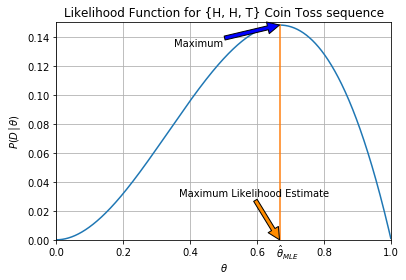

<IPython.core.display.Math object>

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


theta = np.arange(0.0, 1.0, 0.001)
p_likelihood=(theta**2-theta**3)
plt.plot(theta, p_likelihood)
plt.plot([2/3,2/3], [0,max(p_likelihood)])
plt.axis([0, 1, 0, 0.15])
plt.grid(True)
plt.annotate('Maximum Likelihood Estimate', xy=(2/3, 0), xytext=(2/3-0.3, 0.03),
            arrowprops=dict(facecolor='darkorange', shrink=2),
            )
plt.annotate(r'$\hat{\theta}_{MLE}$', (0,0), (220, -3), xycoords='axes fraction', textcoords='offset points', va='top')
plt.annotate('Maximum', xy=(2/3, max(p_likelihood)), xytext=(0.35, 0.9*max(p_likelihood)),
            arrowprops=dict(facecolor='b', shrink=2),
            )
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(D│θ)$')
plt.title('Likelihood Function for {H, H, T} Coin Toss sequence')
plt.show()

display(Math(r'P(H)=\tfrac{2}{3} \text{  (The probability of getting heads in our coin toss is} \tfrac{2}{3} \text{)}'))

### Case 2: Bayesian MAP estimate

Bayesian estimation assumes that we have prior knowledge about the thing we are trying to estimate, and Bayesian estimation assumes that our estimate is random rather than deterministic. Let’s use our prior knowledge that we expect a fair coin, that is, $θ=\tfrac{1}{2}$. But this is not random, so instead, let’s make θ random by taking a leap of imagination and supposing that we have a box of coins and that we conduct each coin toss with different coin where some of our coins are a bit dodgy.  Maybe of coins are unusually weighted, or some have become a bit warped with age, with the result that a Gaussian prior is reasonable for our data.  That is, a Gaussian probability density function with mean=0.5.  (i.e the expected value of θ, $E[θ]=\tfrac{1}{2}$, and our prior knowledge of coin tossing is a Gaussian pdf),

$P(θ)=\tfrac{1}{\sqrt{2π\sigma^2}} e^{\tfrac{-(θ-0.5)^2}{2\sigma^2}}$

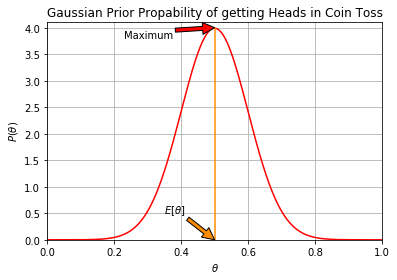

In [4]:
#plot gaussian prior

sig=0.1
p_theta=1/np.sqrt(2*np.pi*sig**2)*np.exp((-(theta-0.5)**2)/(2*sig**2))
plt.plot(theta, p_theta, 'red')
plt.plot([0.5,0.5], [0,max(p_theta)], 'darkorange')
plt.axis([0, 1, 0, 4.1])
plt.grid(True)
plt.annotate(r'$E[\theta]$', xy=(0.5, 0), xytext=(0.5-0.15, 0.5),
            arrowprops=dict(facecolor='darkorange', shrink=2),
            )
plt.annotate('Maximum', xy=(0.5, 4), xytext=(0.23, 3.8),
            arrowprops=dict(facecolor='red', shrink=2),
            )
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(θ)$')
plt.title('Gaussian Prior Propability of getting Heads in Coin Toss')
plt.show()


The maximum a-posteriori estimate is, $θ_{MAP}=\arg \max_θ⁡ P(θ|D)$.

Using Bayes Rule, $P(θ│D)$ is proportional to the product of the likelihood from our measured data and the prior probability. (Color coding of the probabilty and likelihood distributions corresponds to their associated plots). 

$\Large {\color{purple}{P(θ│D)}}=\frac{   {\color{blue}{P(θ|D)}}    {\color{red}{P(θ)}}  }{  {\color{green}{\int P(θ|D)P(θ) dθ}}} =  
\frac{   {\color{blue}{\left(θ^2-θ^3\right)}}    {\color{red}{\left(\tfrac{1}{\sqrt{2π\sigma^2}} e^{\tfrac{-(θ-0.5)^2}{2\sigma^2}}\right)}}  }{  {\color{green}{\left(\text{constant normalising term}\right)}}}$

Here, $P(θ|D)$ is a probability since  $\int_0^1 P(θ|D) dθ=1$ (the normalising term makes sure of this).  The denominator $\int P(θ|D)P(θ) dθ$ evaluates to a constant, therefore we can neglect this from the maximisation mathematics and $\arg \max_θ P(θ│D)$ is simply equal to $\arg \max_θ P(θ|D)P(θ)$.

The plot below illustrates $P(θ│D)$.  The plot shows that $θ_{MAP}= 0.518$.  The prior probability $P(θ)$ tells us that the expected value of $θ$ is $\tfrac{1}{2}$, $\left(E[θ]=\tfrac{1}{2}\right)$, with some margin of error due to our dodgy coins, where this error margin is mathematically modelled by the variance in our Gaussian prior.  Our measurment data indicates that heads were twice as likely as tails $\left(E[θ]=\tfrac{2}{3}\right)$.  The MAP estimate makes the best decision (statistically best decision) between the prior knowledge and the data we measured.


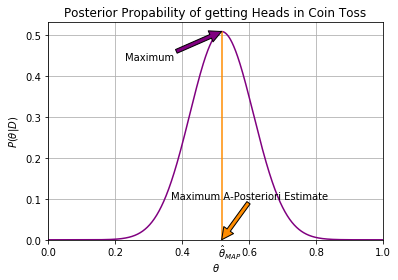

The probability of Heads, P(H) using the Bayesian Maximum A-Posteriori Estimate is 0.518


In [5]:
# plot product of gaussian prior and likelihood and find the Bayesian Maximum A-Posteriori Estimate 
p_posterior=p_theta*p_likelihood
plt.plot(theta, p_posterior, 'purple')
max_p=max(p_posterior)
max_ind=np.argmax(p_posterior)

plt.plot([theta[max_ind],theta[max_ind]], [0,max_p], 'darkorange')
plt.axis([0, 1, 0, 0.53])
plt.grid(True)
plt.annotate('Maximum A-Posteriori Estimate', xy=(theta[max_ind], 0), xytext=(theta[max_ind]-0.15, 0.1),
            arrowprops=dict(facecolor='darkorange', shrink=2),
            )
plt.annotate('Maximum', xy=(theta[max_ind], max_p), xytext=(0.23, max_p-0.07),
            arrowprops=dict(facecolor='purple', shrink=2),
            )
plt.annotate(r'$\hat{\theta}_{MAP}$', (0,0), (170, -3), xycoords='axes fraction', textcoords='offset points', va='top')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$P(θ|D)$')
plt.title('Posterior Propability of getting Heads in Coin Toss')
plt.show()

print ("The probability of Heads, P(H) using the Bayesian Maximum A-Posteriori Estimate is %s" % theta[max_ind])

# Interactive illustrative estimator with coin toss using widgets

Choose a sequence of heads and tails using test field entry box, and the variance of the prior using the slider below to view and compare the Maximum Likelihood Estimate and the Bayesian Maximum A-Posteriori estimate:

H=Heads, T=Tails; Your Coin Toss outcome sequence is: HHT
Sigma=Standard deviation of Gaussian Prior Propability of getting Heads in Coin Toss, your value of sigma is: 0.5


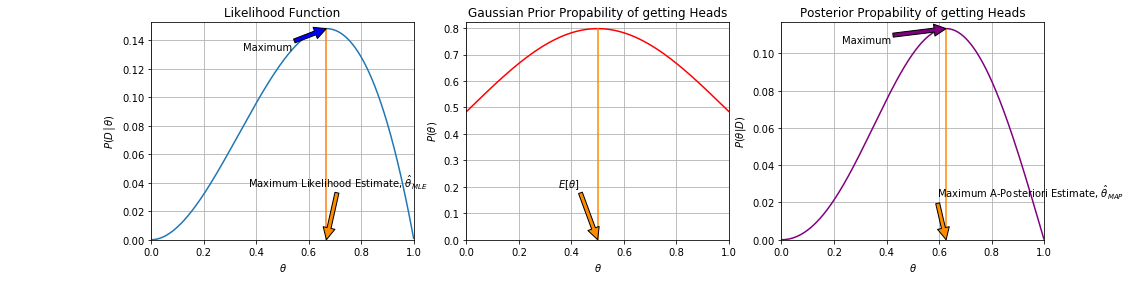

The probability of Heads, $P(H)=\theta$, using the Maximum Likelihood Estimate is 0.667
The expected value of  $P(H)=\theta$  using the Prior Probability is 0.5
The probability of Heads,  $P(H)=\theta$, using the Bayesian Maximum A-Posteriori Estimate is 0.627


<function __main__.pltML>

In [158]:
from ipywidgets import * # * => import everything
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display, Math, Latex

#user enter Heads or Tails as text sequence of H and T
print('Enter data sequence for Coin Toss, example, HHT for head head tails')

#theta = np.arange(0.0, 1.0, 0.001)


def pltML(userinput, sigma):
    plt.figure(figsize=(16, 4))
    sig=sigma
    theta = np.arange(0.0, 1.0, 0.001)
    print('H=Heads, T=Tails; Your Coin Toss outcome sequence is:', userinput)
    print('Sigma=Standard deviation of Gaussian Prior Propability of getting Heads in Coin Toss, your value of sigma is:', sig)
    #print('type of user input is',type(userinput))
    UsrInptList = list(userinput)
    #print(UsrInptList)
    UsrInptArray=np.array(UsrInptList)
    p_likelihood=np.ones([max(theta.shape),UsrInptArray.shape[0]]) #preallocate
    #print('number of coin tosses is')
    #print(UsrInptArray.shape[0])
    theta=np.arange(0.0, 1.0, 0.001)
    #print(UsrInptArray)
    #print(UsrInptArray.shape[0])
    for i in range(UsrInptArray.shape[0]):
        #print(i)
        outcome=UsrInptArray[i]
        #print(p_Likelihood)
        #type(outcome) #it was a str
        #print('npequalH', outcome == 'H')
        #print('npequalT', outcome == 'T')
        if outcome == 'H': #if outcome is 'H': np.equal(outcome, 'H'):
            p_likelihood[:,i]=theta
        #    print('in here H, ', i)
        elif outcome == 'T': #if outcome is 'T':
            p_likelihood[:,i]=1-theta
        #    print('in here T, ', i)
    
    #print('type(p_likelihood)=', type(p_likelihood)) 
    #print('p_likelihood.shape=', p_likelihood.shape)    
    p_Likelihood=p_likelihood.prod(axis=1)
    #print('p_Likelihood.shape=', p_Likelihood.shape)
    #print('p_likelihood values=', p_likelihood[:,[0,1,2]])
    
    #print('p_Likelihood=', p_Likelihood) 
        #display(Likelihood)
    #print(p_Likelihood)
    maxL=max(p_Likelihood)
    maxL_ind=np.argmax(p_Likelihood)#index=np.unravel_index(np.argmax(p_Likelihood), p_Likelihood.shape)#
    #print('max(p_Likelihood)=',max(p_Likelihood),'maxL_ind=', maxL_ind)
    plt.subplot(131)
    plt.plot(theta, p_Likelihood)
    plt.plot([theta[maxL_ind],theta[maxL_ind]], [0,maxL])
    plt.axis([0, 1, 0, maxL+0.03*maxL])
    plt.grid(True)
    plt.annotate(r'Maximum Likelihood Estimate, $\hat{\theta}_{MLE}$', xy=(theta[maxL_ind], 0), 
            xytext=(theta[maxL_ind]-0.3, maxL*0.25),
            arrowprops=dict(facecolor='darkorange', shrink=2),
            )
    #plt.annotate(r'$\hat{\theta}_{MLE}$', (0,0), (220, -3), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate('Maximum', xy=(theta[maxL_ind], max(p_Likelihood)), xytext=(0.35, 0.9*max(p_Likelihood)),
            arrowprops=dict(facecolor='b', shrink=2),
            )
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(D│θ)$')
    plt.title('Likelihood Function')
    #plt.show()
    
    #sig=0.1
    plt.subplot(132)
    p_theta=1/np.sqrt(2*np.pi*sig**2)*np.exp((-(theta-0.5)**2)/(2*sig**2))
    plt.plot(theta, p_theta, 'red')
    plt.plot([0.5,0.5], [0,max(p_theta)], 'darkorange')
    plt.axis([0, 1, 0, max(p_theta)+0.03*max(p_theta)])
    plt.grid(True)
    plt.annotate(r'$E[\theta]$', xy=(0.5, 0), xytext=(0.5-0.15, 0.25*max(p_theta)),
                arrowprops=dict(facecolor='darkorange', shrink=2),
                )
    plt.annotate('Maximum', xy=(0.5, 4), xytext=(0.23, 3.8),
                arrowprops=dict(facecolor='red', shrink=2),
                )
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(θ)$')
    plt.title('Gaussian Prior Propability of getting Heads')
    
    plt.subplot(133)
    p_posterior=p_theta*p_Likelihood
    plt.plot(theta, p_posterior, 'purple')
    max_p3=max(p_posterior)
    max_ind3=np.argmax(p_posterior)

    plt.plot([theta[max_ind3],theta[max_ind3]], [0,max_p3], 'darkorange')
    plt.axis([0, 1, 0, max_p3+0.03*max_p3])
    plt.grid(True)
    plt.annotate(r'Maximum A-Posteriori Estimate, $\hat{\theta}_{MAP}$', xy=(theta[max_ind3], 0), 
                 xytext=(theta[max_ind3]-0.3*max_p3, max_p3*0.2),
                arrowprops=dict(facecolor='darkorange', shrink=2),
                )
    plt.annotate('Maximum', xy=(theta[max_ind3], max_p3), xytext=(0.23, max_p3-0.07*max_p3),
                arrowprops=dict(facecolor='purple', shrink=2),
                )
    #plt.annotate(r'$\hat{\theta}_{MAP}$', (0,0), (170, -3), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(θ|D)$')
    plt.title('Posterior Propability of getting Heads')
    
    plt.show()

    print (r'The probability of Heads, $P(H)=\theta$, using the Maximum Likelihood Estimate is', theta[maxL_ind])
    print (r'The expected value of  $P(H)=\theta$  using the Prior Probability is 0.5')
    print (r'The probability of Heads,  $P(H)=\theta$, using the Bayesian Maximum A-Posteriori Estimate is', theta[max_ind3])
    


#sigma=(min,max,step)
interact(pltML, userinput='HHT', sigma=(0.1,1.0,0.1))


In [102]:
mystr=['H']
type(mystr)
mystr = list(mystr)
outcome=np.array(mystr)
type(outcome)
#outcome=UsrInptArray
myarray=np.zeros([5,5]) 
print(type(theta))
print(myarray, theta[0:5])
theta[1:5].shape
myarray[1,:]=list(theta[0:5])
print(myarray)
index=np.argmax(myarray)
index=np.unravel_index(np.argmax(myarray), myarray.shape)
print(index)

<class 'numpy.ndarray'>
[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]] [ 0.     0.001  0.002  0.003  0.004]
[[ 0.     0.     0.     0.     0.   ]
 [ 0.     0.001  0.002  0.003  0.004]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.   ]]
(1, 4)


In [86]:
test='T'
type(test)

str

In [134]:
test=['H','H','T']
type(test)
testnew=np.array(test)
testnew[1]
testnew.shape[0]
values=[2,2,2,2]
vect=np.array(values)
result=np.prod(vect)
result
theta=np.arange(0.0, 1.0, 0.001)
ans=theta*theta
#vars[0,1] = np.array([1,2,3])
#vars[:,1] = np.array([99,98,97])
#vars
test=['HHT']
type(test)
charsFromlist = []
for char in test:
    charsFromlist.append(char)
charsFromlist[0]


SyntaxError: invalid syntax (<ipython-input-134-24677ec331ef>, line 22)

In [29]:
num_coin_toss=10;

item_layout = Layout(height='60px', min_width='50px')
items = [ToggleButtons(layout=item_layout, options=['H','T'], description=str(i), button_style='') for i in range(num_coin_toss)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_direction='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
display(VBox([Label('Scroll horizontally to set outcome [heads(H) or tails(T)] for each coin toss 0,1,2,...  :'), carousel]))


def pltML(items):
    p_Likelihood=1
    for i in range(num_coin_toss):
        outcome=items[i].value
        #type(outcome) #it was a str
        if outcome is 'H':
            p_likelihood=theta
        elif outcome is 'T':
            p_likelihood=1-theta
        p_Likelihood=p_Likelihood*p_likelihood
        #display(Likelihood)

    maxL=max(p_Likelihood)
    maxL_ind=np.argmax(p_Likelihood)
    plt.plot(theta, p_Likelihood)
    plt.plot([maxL_ind,maxL_ind], [0,maxL])
    plt.axis([0, 1, 0, 1.0])
    plt.grid(True)
    plt.annotate('Maximum Likelihood Estimate', xy=(maxL_ind, 0), xytext=(maxL_ind-0.3, 0.03),
            arrowprops=dict(facecolor='darkorange', shrink=2),
            )
    plt.annotate(r'$\hat{\theta}_{MLE}$', (0,0), (220, -3), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate('Maximum', xy=(2/3, max(p_likelihood)), xytext=(0.35, 0.9*max(p_likelihood)),
            arrowprops=dict(facecolor='b', shrink=2),
            )
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(D│θ)$')
    plt.title('Likelihood Function for {H, H, T} Coin Toss sequence')
    plt.show()

pltML(p_Likelihood)
#interact(pltML, p_Likelihood=widgets.IntSlider(min=-10,max=30,step=1,value=10))
#interact(pltML,items = [ToggleButtons(layout=item_layout, options=['H','T'], description=str(i), button_style='') for i in range(num_coin_toss)])


AttributeError: 'numpy.float64' object has no attribute 'value'

In [30]:
num_coin_toss=10;

item_layout = Layout(height='60px', min_width='50px')
items = [ToggleButtons(layout=item_layout, options=['H','T'], description=str(i), button_style='') for i in range(num_coin_toss)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_direction='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
display(VBox([Label('Scroll horizontally to set outcome (heads(H) or tails(T) for each coin toss 0,1,2,...  :'), carousel]))

display(items[1].value)

def pltML(items):
    p_Likelihood=1
    for i in range(num_coin_toss):
        outcome=items[i].value
        #display(outcome)
    #type(outcome) #it was a str
        if outcome is 'H':
            p_likelihood=theta
        elif outcome is 'T':
            p_likelihood=1-theta
        p_Likelihood=p_Likelihood*p_likelihood
    #display(Likelihood)
    
    maxL=max(p_Likelihood)
    maxL_ind=np.argmax(p_Likelihood)
    plt.plot(theta, p_Likelihood)
    plt.plot([maxL_ind,maxL_ind], [0,maxL])
    plt.axis([0, 1, 0, 0.15])
    plt.grid(True)
    plt.annotate('Maximum Likelihood Estimate', xy=(maxL_ind, 0), xytext=(maxL_ind-0.3, 0.03),
            arrowprops=dict(facecolor='darkorange', shrink=2),
            )
    plt.annotate(r'$\hat{\theta}_{MLE}$', (0,0), (220, -3), xycoords='axes fraction', textcoords='offset points', va='top')
    plt.annotate('Maximum', xy=(2/3, max(p_likelihood)), xytext=(0.35, 0.9*max(p_likelihood)),
            arrowprops=dict(facecolor='b', shrink=2),
            )
    plt.xlabel(r'$\theta$')
    plt.ylabel(r'$P(D│θ)$')
    plt.title('Likelihood Function for {H, H, T} Coin Toss sequence')
    plt.show()
    
#interact(pltML, widgets.IntSlider(min=-10,max=30,step=1,value=10))
interact(pltML, items = [ToggleButtons(layout=item_layout, options=['H','T'], description=str(i), button_style='') for i in range(num_coin_toss)])
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_direction='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
display(VBox([Label('Scroll horizontally to set outcome (heads(H) or tails(T) for each coin toss 0,1,2,...  :'), carousel]))


AttributeError: 'str' object has no attribute 'value'

In [31]:
items[1].value

'H'

In [298]:
item_layout = Layout(height='100px', min_width='40px')
items = [Button(layout=item_layout, description=str(i), button_style='warning') for i in range(5)]
box_layout = Layout(overflow_x='scroll',
                    border='3px solid black',
                    width='500px',
                    height='',
                    flex_direction='row',
                    display='flex')
carousel = Box(children=items, layout=box_layout)
VBox([Label('Scroll horizontally:'), carousel])



#ToggleButton

 #widgets.RadioButtons(
    #options=['Heads', 'Tails'],
    #description="Coin Toss %s" % i,
    #disabled=False
    #)

#def pltsin(f):
#    plt.plot(t, np.sin(2*np.pi*t*f))
#    plt.show()
    
#interact(pltsin, f=(1,10,0.1))

In [304]:

display('Coin Toss')

for i in range(5):
    w=widgets.ToggleButtons(
    options=['Heads', 'Tails'],
    description="Coin Toss %s:" % i,
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    )
    display(w)    

def pltML(D):
    plt.plot(theta, theta)
    plt.show()
    
#interact(pltsin, f=(1,10,0.1))

#interact(pltML, D=True)  
#interact(pltML,D=['apples','oranges'])
interact(pltML, w)

'Coin Toss'

TypeError: interact() takes from 0 to 1 positional arguments but 2 were given

In [289]:
import ipywidgets
ipywidgets

for i in range(5):
    w=widgets.ToggleButtons(
    options=['Heads', 'Tails'],
    description="Coin Toss %s:" % i,
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    )
    display(w)   

In [15]:
#define the widget, example a text box
from ipywidgets import widgets
text=widgets.Text()
display(text)
text.value='Enter your text here'

#link a python function to the widget so that you can run phython commands based on changing input to the widget
def handle_submit(sender):
    print(text.value)

text.on_submit(handle_submit)

Enter your text here
My message


In [18]:
#define the widget, example a button
from ipywidgets import widgets
button=widgets.Button(decription="Click Me!")
display(button)

#link a python function to the widget so that you can run phython commands based on changing input to the widget
def on_button_clicked(b):
    print("button clicked")
    
button.on_click(on_button_clicked)

<bound method Button.on_click of <ipywidgets.widgets.widget_button.Button object at 0x0000000005002CF8>>

In [255]:
#from ipywidgets import Interact, RangeWidget, RadioWidget

RadioWidget=widgets.RadioButtons(
    options=['Heads', 'Tails'],
#     value='pineapple',
    description='Coin Toss:',
    disabled=False
)

def plot(amplitude, color):
    fig, ax = plt.subplots(figsize=(4, 3),
                           subplot_kw={'axisbg':'#EEEEEE',
                                       'axisbelow':True})
    ax.grid(color='w', linewidth=2, linestyle='solid')
    x = np.linspace(0, 10, 1000)
    ax.plot(x, amplitude * np.sin(x), color=color,
            lw=5, alpha=0.4)
    ax.set_xlim(0, 10)
    ax.set_ylim(-1.1, 1.1)
    return fig

interact(plot,
               amplitude=RangeWidget(0.1, 1.0, 0.1),
               color=RadioWidget(['blue', 'green', 'red']))

NameError: name 'RangeWidget' is not defined

In [23]:
outputtext = widgets.Text()
outputtext

In [24]:
inputtext = widgets.Text()

def makeUpperCase(sender):
    outputtext.value=inputtext.value.upper()
    
inputtext.on_submit(makeUpperCase)
inputtext



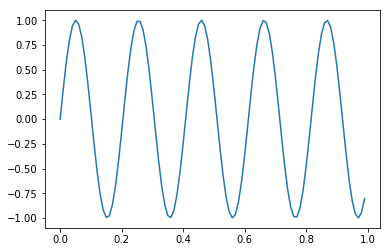

<function __main__.pltsin>

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import math as m
from ipywidgets import *  # * => import everything

t = np.arange(0.0, 1.0, 0.01)
display(t)



def pltsin(f):
    plt.plot(t, np.sin(2*np.pi*t*f))
    plt.show()
    
interact(pltsin, f=(1,10,0.1))